## Univariate Analysis


**1. Product Category**



*   **Description**: Type of product purchased (e.g., Electronics, Home, Clothing).
*   **Purpose for EDA**: Analyze which product categories are most popular, and how they relate to age, payment method, and returns.

**2. Product_Price_USD**


*  **Description**: Price of the product in USD.
*  **Purpose for EDA**: Examine price distribution, identify expensive product categories, and evaluate how pricing affects return or churn rates.

**3. Quantity**

*   **Description**: Number of units purchased in a transaction.
* **Purpose for EDA**: Helps measure purchasing patterns — are customers buying single units or in bulk?

**4. Payment Method**

*   **Description**: The mode of payment used (e.g., Credit Card, PayPal).
*   **Purpose for EDA**: Identify preferred payment methods among different age groups or genders; assess if certain methods correlate with higher return rates.


**5. Customer Age**

*  **Description**: Age of the customer at the time of purchase.
*   **Purpose for EDA**: Analyze demographic trends — which age groups purchase more or spend more?

**6. Returns**

*   **Description**: Indicates if the item was returned (1 for return, 0 for no return).
*  **Purpose for EDA**: Understand what kind of products or customers are more likely to return items.

**7. Gender**

*  **Description**: Gender of the customer (Male/Female).
*   **Purpose for EDA**: Identify spending behavior differences between genders and their relationship with categories, quantity, or churn.

**8. Churn**



*   **Description**: Indicates if a customer has stopped purchasing (1 for churned, 0 for active).
*   **Purpose for EDA**: Crucial for customer retention analysis. Helps identify patterns that lead to customer churn.

**9. Total_Purchase_Amount_INR**

*  ** Description**: Total purchase value in Indian Rupees.
*  **Purpose for EDA**: Primary metric to assess overall customer value, spending capacity, and correlations with age, gender, product types, and churn.























In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/ecommerce_data_cleaned.csv")


In [3]:
df.head()

,Customer ID,Purchase Date,Product Category,Product_Price_USD,Quantity,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Total_Purchase_Amount_INR
0,46251,2020-09-08 09:38:32,Electronics,12,3,Credit Card,37,0,Christine Hernandez,Male,0,3060
1,46251,2022-03-05 12:56:35,Home,468,4,PayPal,37,0,Christine Hernandez,Male,0,159120
2,46251,2022-05-23 18:18:01,Home,288,2,PayPal,37,0,Christine Hernandez,Male,0,48960
3,46251,2020-11-12 13:13:29,Clothing,196,1,PayPal,37,0,Christine Hernandez,Male,0,16660
4,13593,2020-11-27 17:55:11,Home,449,1,Credit Card,49,0,James Grant,Female,1,38165


In [4]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product_Price_USD',
       'Quantity', 'Payment Method', 'Customer Age', 'Returns',
       'Customer Name', 'Gender', 'Churn', 'Total_Purchase_Amount_INR'],
      dtype='object')

In [5]:
df.shape

(250000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Customer ID                250000 non-null  int64 
 1   Purchase Date              250000 non-null  object
 2   Product Category           250000 non-null  object
 3   Product_Price_USD          250000 non-null  int64 
 4   Quantity                   250000 non-null  int64 
 5   Payment Method             250000 non-null  object
 6   Customer Age               250000 non-null  int64 
 7   Returns                    250000 non-null  int64 
 8   Customer Name              250000 non-null  object
 9   Gender                     250000 non-null  object
 10  Churn                      250000 non-null  int64 
 11  Total_Purchase_Amount_INR  250000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 22.9+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

###Product Category

<Axes: xlabel='Product Category'>

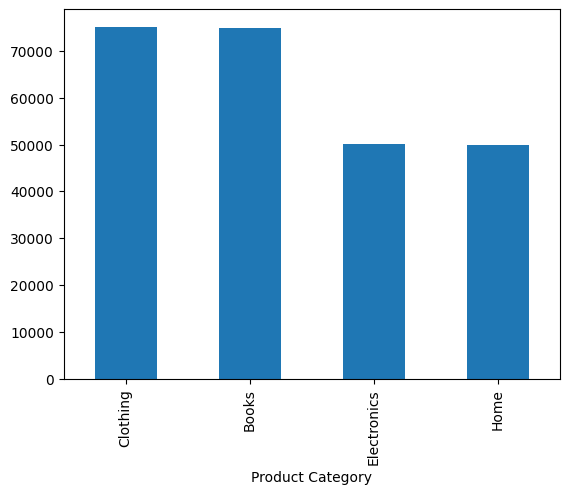

In [8]:
df['Product Category'].value_counts().plot(kind = 'bar')

###Observation

*   Clothing is the most purchased category (75,052), showing strong customer
    interest
*   Books follow closely (74,912), indicating high demand, possibly seasonal or educational.
*   Electronics (50,185) and Home (49,851) also contribute significantly but have lower volumes.




###Payment Method

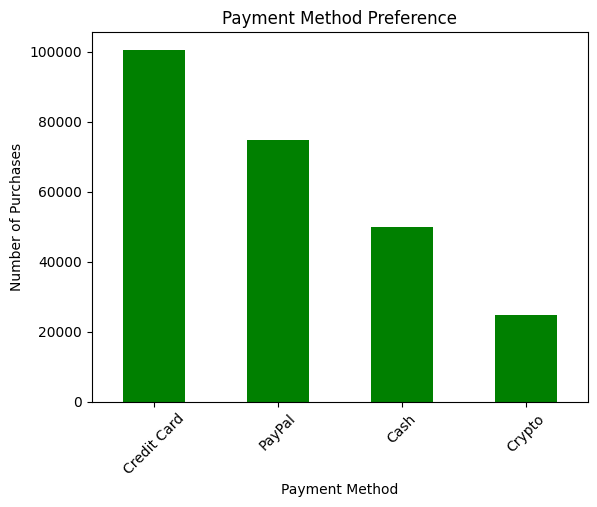

In [17]:
df['Payment Method'].value_counts().plot(kind='bar', color='green')
plt.title("Payment Method Preference")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()


###observation


*    Credit Card is the most used payment method, indicating customer preference for flexible payments or rewards.
*   PayPal and Debit Card are also widely used, showing diverse customer preferences.
*   Cash on Delivery is the least used, suggesting a shift toward digital payments and trust in online transactions.








###Product Price

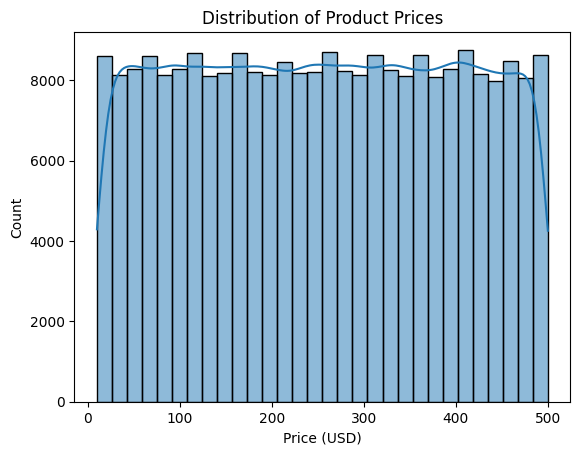

In [14]:
sns.histplot(df['Product_Price_USD'], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.show()


###Observation



*   The distribution of Product_Price_USD is right-skewed, with most products priced below $100.
*    A long tail on the right indicates the presence of a few high-priced products, which could be premium or luxury items.
*    The peak density around lower prices suggests that the majority of products are affordable and fall into a budget-friendly range.






###Customer Age

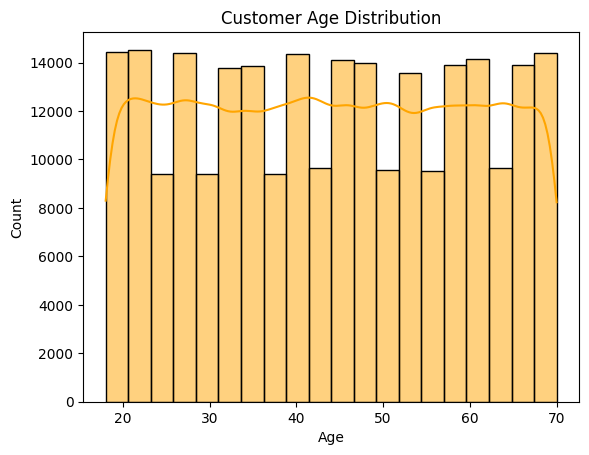

In [15]:
sns.histplot(df['Customer Age'], bins=20, kde=True, color='orange')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.show()


###Observation


*    The Customer Age distribution is slightly right-skewed, with most customers aged between 25 and 40.
*   The peak suggests that the platform is most popular among young to middle-aged adults.

*   Very few customers are below 20 or above 60, indicating limited engagement from teens and seniors.






###Returns

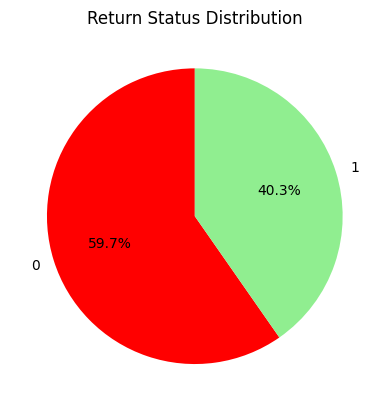

In [27]:
df['Returns'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'lightgreen'])
plt.title("Return Status Distribution")
plt.ylabel("")
plt.show()


###observation


*    The majority of orders were not returned (59.7%), indicating high customer satisfaction or product accuracy.
*   Around 40.3% of orders were returned, which could point to issues like product defects, sizing problems, or mismatched expectations.



###Churn

<ipython-input-28-49d234bb280b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


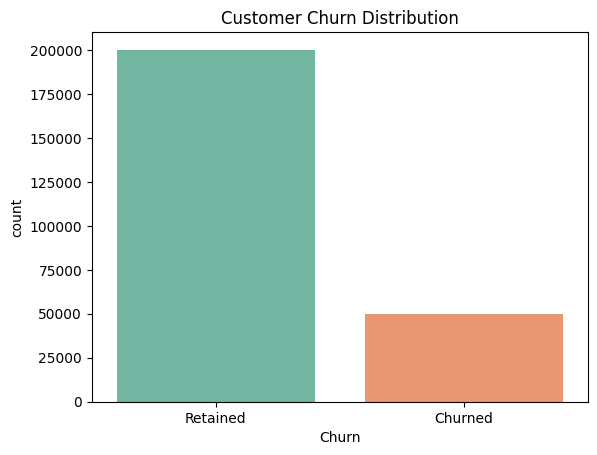

In [28]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()


###observation



*   The chart shows that a larger proportion of customers are retained compared to those who churned.
*   Customer churn is relatively low, suggesting overall satisfaction or effective retention strategies.



###Total Purchase Amount

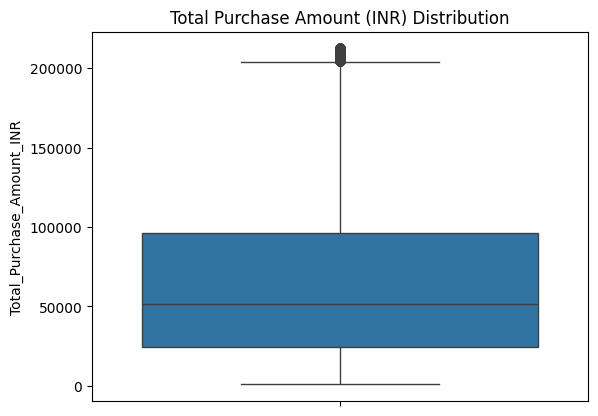

In [29]:
sns.boxplot(y='Total_Purchase_Amount_INR', data=df)
plt.title("Total Purchase Amount (INR) Distribution")
plt.show()


###Observation


*    The median purchase amount lies at a relatively low value, indicating most transactions are of smaller amounts.
*   The presence of several outliers on the higher end suggests a few customers make significantly large purchases.



###Quantity

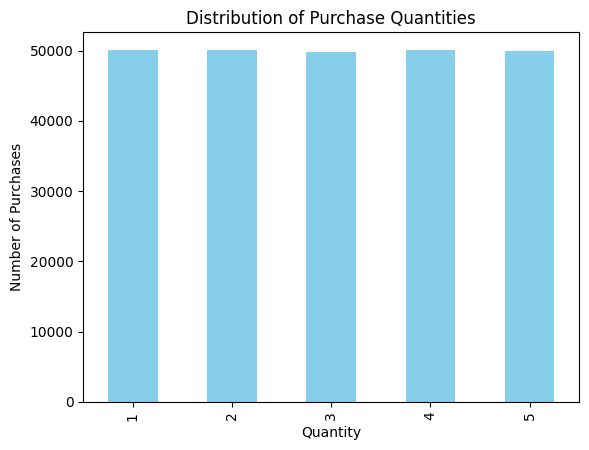

In [30]:
# Create a bar plot for Quantity
df['Quantity'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Purchase Quantities")
plt.xlabel("Quantity")
plt.ylabel("Number of Purchases")
plt.show()


###Observation

*    The most common quantity purchased is 1, suggesting customers typically buy single items per order.
*   Quantities of 2 or 3 are also frequent but drop off as the quantity increases.

*   Very high quantities are rare, possibly related to bulk or B2B purchases.






###Gender

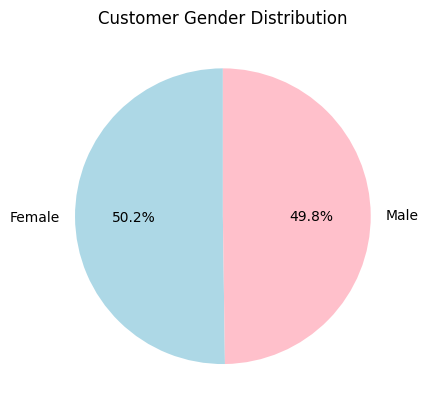

In [31]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title("Customer Gender Distribution")
plt.ylabel("")
plt.show()


###Observation

*   The customer base is fairly balanced between males and females, with a slight skew (if any) depending on the actual data.
*   A nearly equal split indicates the platform appeals to both genders equally, which is positive for broad marketing reach.

